# 2 - Plottaggio Prezzi

## Caricamento librerie/moduli standard

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Caricamento libreria da GitHub

In [2]:
import httpimport as imp

GitHubSF='https://raw.githubusercontent.com/Paodidom/Evento-25-marzo-SF-Club-Unipi/9757fef839a2cc93434e11edd301e411275316d4/StartingShared/'

with imp.remote_repo(GitHubSF):
    import metcomputlib as mc

## Moduli disponibili

In [3]:
mc.Ver()

------------------------------------------------------------------------------------------
Saturday, March 22, 2025, 12:44:25
Platform : Linux-6.1.85+-x86_64-with-glibc2.35
------------------------------------------------------------------------------------------
Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
JupyterLab NONE
------------------------------------------------------------------------------------------
Matplotlib 3.10.0
Pandas 2.2.2
NumPy 2.0.2
SciPy 1.14.1
------------------------------------------------------------------------------------------


## Caricamento Dati

In [4]:
# load csv in a DataFrame
Aapl = mc.ReadStockPrices(GitHubSF+'AAPL.csv')
Ibm = mc.ReadStockPrices(GitHubSF+'IBM.csv')
Msft = mc.ReadStockPrices(GitHubSF+'MSFT.csv')

# define the time period of interest
day1 = np.datetime64('2000-01-01')
day2 = np.datetime64('2000-01-31')

# extract single columns from DataFrame
Da = Aapl['Date'].values
Oa = Aapl['Open'].values
Ha = Aapl['High'].values
La = Aapl['Low'].values
Ca = Aapl['Close'].values
Va = Aapl['Volume'].values

# extract single columns from DataFrame
Dm = Msft['Date'].values
Om = Msft['Open'].values
Hm = Msft['High'].values
Lm = Msft['Low'].values
Cm = Msft['Close'].values
Vm = Msft['Volume'].values

## Determinazione righe del periodo per i due titoli

In [5]:
rowsa = np.where((Da >= day1) & (Da <= day2))[0]
if len(rowsa) == 0:
    raise ValueError("No data available for the requested period")
r1a = rowsa[0]
r2a = rowsa[-1]

rowsm = np.where((Dm >= day1) & (Dm <= day2))[0]
if len(rowsm) == 0:
    raise ValueError("No data available for the requested period")
r1m = rowsm[0]
r2m = rowsm[-1]

## Plottaggio Grafico senza uso di funzioni

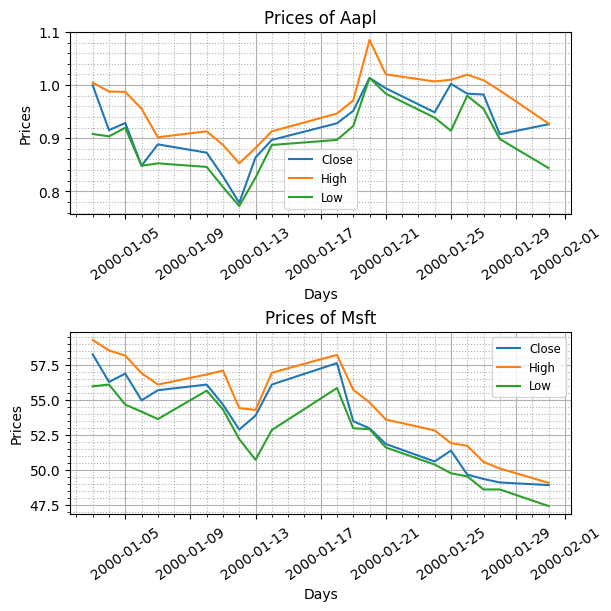

In [6]:
plt.figure(figsize=(6, 6), layout='constrained')
# First subplot
plt.subplot(2, 1, 1)
plt.plot(Da[r1a:(r2a+1)], Ca[r1a:(r2a+1)], label='Close')
plt.plot(Da[r1a:(r2a+1)], Ha[r1a:(r2a+1)], label='High')
plt.plot(Da[r1a:(r2a+1)], La[r1a:(r2a+1)], label='Low')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Prices of Aapl')
plt.grid()
plt.grid(which='minor', linestyle=':')
plt.minorticks_on()
plt.tick_params(axis='x', rotation=35)
plt.legend(loc='best', fontsize='small')
# Second subplot
plt.subplot(2, 1, 2)
plt.plot(Dm[r1m:(r2m+1)], Cm[r1m:(r2m+1)], label='Close')
plt.plot(Dm[r1m:(r2m+1)], Hm[r1m:(r2m+1)], label='High')
plt.plot(Dm[r1m:(r2m+1)], Lm[r1m:(r2m+1)], label='Low')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Prices of Msft')
plt.grid()
plt.grid(which='minor', linestyle=':')
plt.minorticks_on()
plt.tick_params(axis='x', rotation=35)
plt.legend(loc='best', fontsize='small')
#
plt.show()

## Plottaggio Grafico con funzione "EndChart()" (metcomputlib)

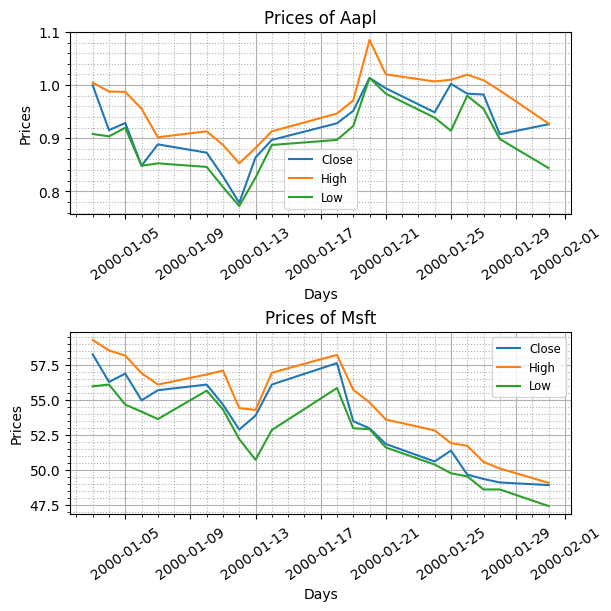

In [7]:
plt.figure(figsize=(6, 6), layout='constrained')
# First subplot
plt.subplot(2, 1, 1)
plt.plot(Da[r1a:(r2a+1)], Ca[r1a:(r2a+1)], label='Close')
plt.plot(Da[r1a:(r2a+1)], Ha[r1a:(r2a+1)], label='High')
plt.plot(Da[r1a:(r2a+1)], La[r1a:(r2a+1)], label='Low')
mc.EndChart(Legend='on', Xlabel='Days', Ylabel='Prices', Title='Prices of Aapl')
# Second subplot
plt.subplot(2, 1, 2)
plt.plot(Dm[r1m:(r2m+1)], Cm[r1m:(r2m+1)], label='Close')
plt.plot(Dm[r1m:(r2m+1)], Hm[r1m:(r2m+1)], label='High')
plt.plot(Dm[r1m:(r2m+1)], Lm[r1m:(r2m+1)], label='Low')
mc.EndChart(Legend='on', Xlabel='Days', Ylabel='Prices', Title='Prices of Msft')
#
plt.show()

## Plottaggio Grafico con uso di funzioni

In [8]:
def FindRows(D, d1, d2):
    rows = np.where((D >= d1) & (D <= d2))[0]
    if len(rows) == 0:
        raise ValueError("No data available for the requested period")
    return rows

def PlotData(D, Y, d1, d2, Label):
    rows = FindRows(D, d1, d2)
    r1 = rows[0]
    r2 = rows[-1]
    plt.plot(D[r1:(r2+1)], Y[r1:(r2+1)], label=Label)

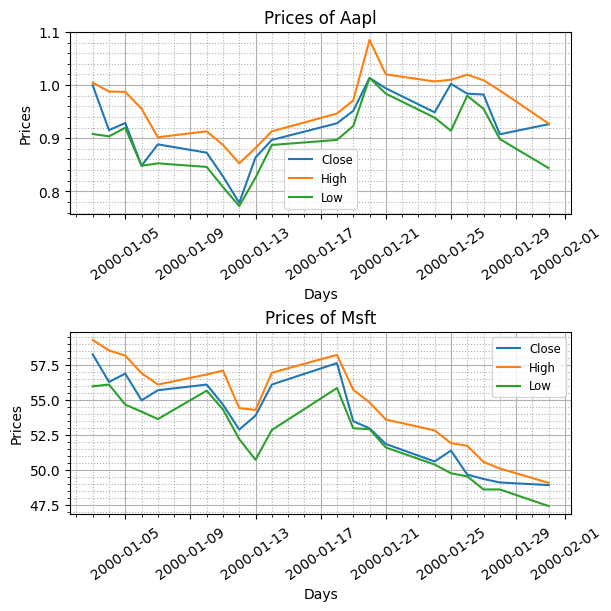

In [9]:
plt.figure(figsize=(6, 6), layout='constrained')
# First subplot
plt.subplot(2, 1, 1)
PlotData(Da, Ca, day1, day2, 'Close')
PlotData(Da, Ha, day1, day2, 'High')
PlotData(Da, La, day1, day2, 'Low')
mc.EndChart(Legend='on', Xlabel='Days', Ylabel='Prices', Title='Prices of Aapl')
# Second subplot
plt.subplot(2, 1, 2)
PlotData(Dm, Cm, day1, day2, 'Close')
PlotData(Dm, Hm, day1, day2, 'High')
PlotData(Dm, Lm, day1, day2, 'Low')
mc.EndChart(Legend='on', Xlabel='Days', Ylabel='Prices', Title='Prices of Msft')
#
plt.show()